<a href="https://colab.research.google.com/github/god05212/Machine-Learning3/blob/main/Machine_Learning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 사용한 데이터셋
> Heart Attack Analysis & Prediction Dataset: A dataset for heart attack classification

- RASHIK RAHMAN
- https://www.kaggle.com/rashikrahmanpritom
- https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

# 1. 소개

## 1.1 데이터 사전 설명

age: 환자의 나이

sex: 환자의 성별

cp: 가슴 통증 유형 ~ 0 = 전형적인 협심증, 1 = 비전형적인 협심증, 2 = 비협심성 통증, 3 = 무증상

trtbps: 안정시 혈압 (mm Hg)

chol: 콜레스테롤 (mg/dl), BMI 센서를 통해 측정됨

fbs: (공복 혈당 > 120 mg/dl) ~ 1 = True, 0 = False

restecg: 안정시 심전도 결과 ~ 0 = 정상, 1 = ST-T파 이상, 2 = 좌심실 비대

thalachh: 최대 심박수

oldpeak: 이전 최저 수치

slp: 기울기

caa: 주요 혈관의 수

thall: 탈륨 스트레스 테스트 결과 ~ (0,3)

exng: 운동 유발 협심증 ~ 1 = 예, 0 = 아니오

output: 0= 심장마비 확률 감소, 1= 심장마비 확률 증가

## 1.2 작업 목표

EDA(탐색적 데이터 분석)를 수행하여 심장 발작에 취약한지 여부를 예측하는 작업을 수행할 것입니다.

# 2. 준비

## 2.1 필요한 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") #경고 메시지가 표시되지 않고 실행이 진행

## 2.2 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/심장마비 분석 및 예측하기/heart.csv')

## 2.3 데이터 이해하기

### 2.3.1 데이터 형태

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


### 2.3.2 데이터 상위 5개 행 미리보기

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.3.3 각 열의 고유한 값 개수 확인하기

In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0] #행 개수, .shape[1]은 열 개수

pd.DataFrame(dict,index=["unique count"]).transpose() #행과 열을 전환

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### 2.3.4 범주형(categorical)과 연속형(continuous) 열 분리하기

In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


### 2.3.5 요약 통계량

In [8]:
df[con_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### 2.3.6 결측값

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# 3. 탐색적 데이터 분석

## 3.1 단변량 분석

### 3.1.1 범주형 변수 Count plot

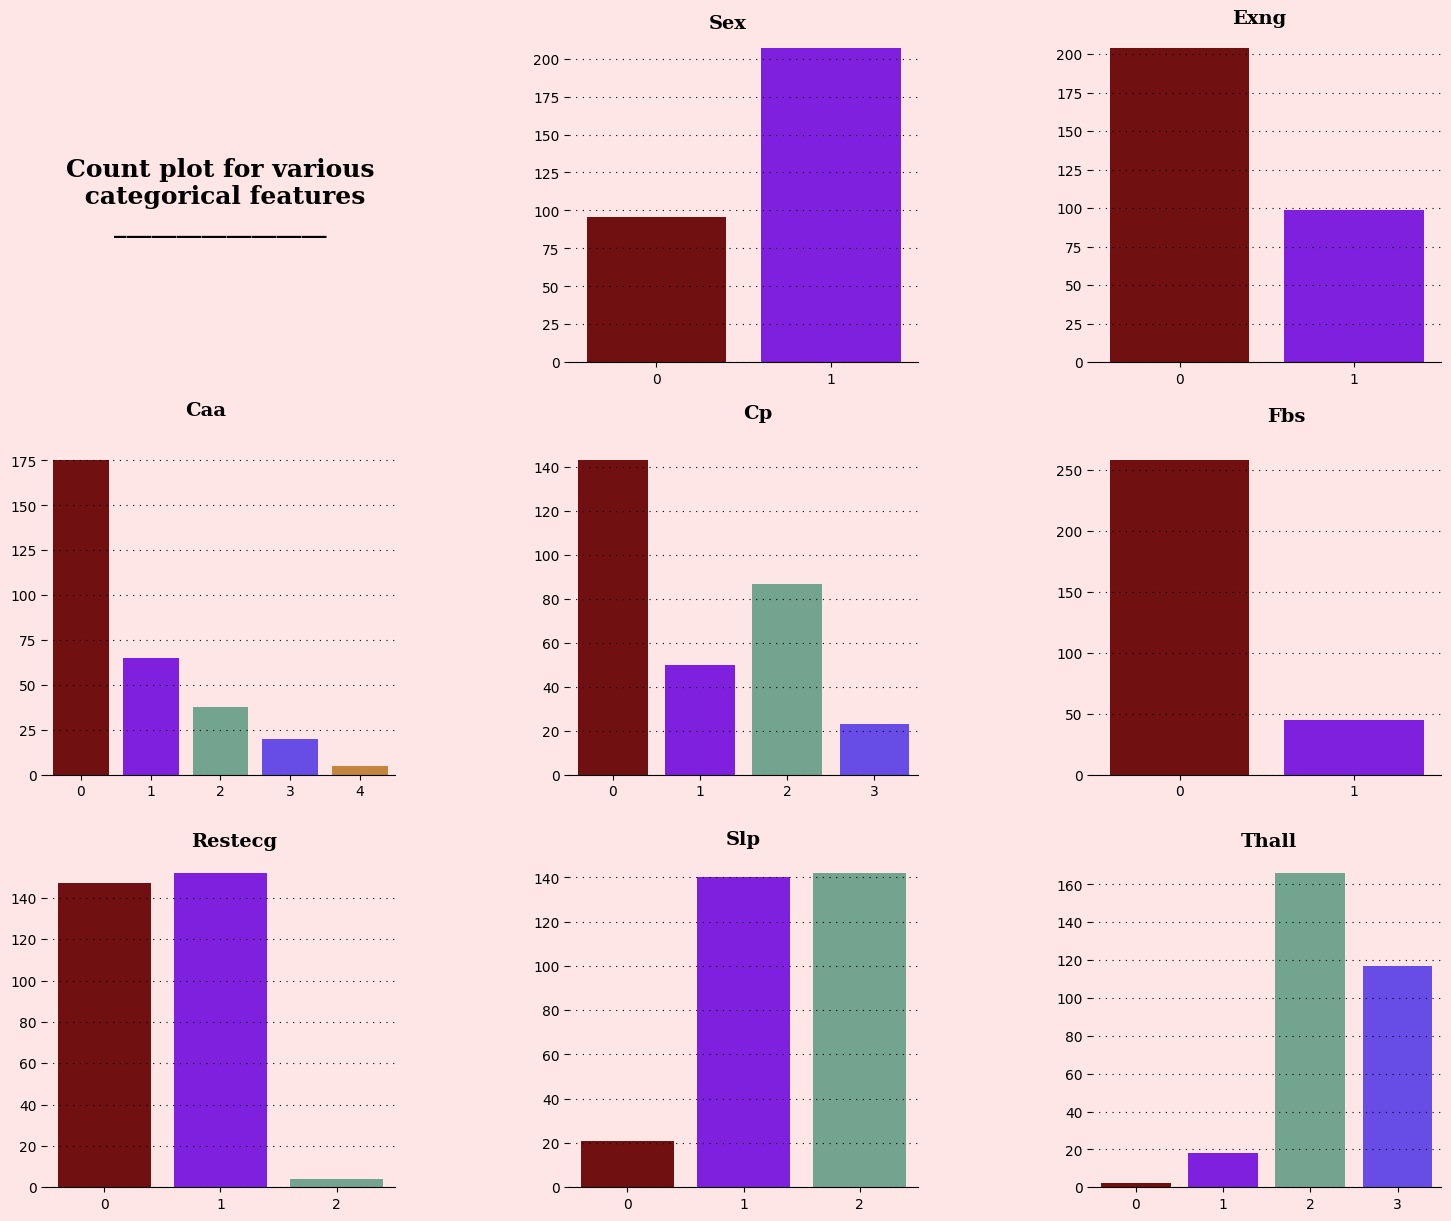

In [10]:
# fig는 플롯을 포함하는 전체 그림을 나타내는 객체입니다. figsize 매개변수는 그림의 크기를 지정합니다.
fig = plt.figure(figsize=(18,15))

# gs는 그리드 스펙(GridSpec) 객체를 생성합니다. add_gridspec 함수를 사용하여 3x3 그리드를 생성합니다.
gs = fig.add_gridspec(3,3)

# gs.update 함수를 사용하여 그리드 간의 간격을 조정합니다.
gs.update(wspace=0.5, hspace=0.25)

# add_subplot 함수를 사용하여 각각의 서브플롯(subplot)을 생성합니다. gs 객체를 사용하여 그리드 위치를 지정합니다.
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


# background_color 변수에 배경색으로 쓸 연한 분홍색을 지정합니다.
background_color = "#ffe6e6"

# color_palette 변수에 각 서브플롯의 색상을 지정합니다.
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# fig.patch.set_facecolor를 사용하여 전체 그림의 배경색을 설정합니다.
fig.patch.set_facecolor(background_color)

# 각각의 서브플롯의 배경색을 set_facecolor 함수를 사용하여 설정합니다.
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)


# Title of the plot
# ax0 서브플롯의 축을 설정합니다. 여기에서는 아래, 왼쪽, 위, 오른쪽 테두리를 모두 제거합니다.
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# tick_params 함수를 사용하여 축의 눈금선을 제거합니다.
ax0.tick_params(left=False, bottom=False)

# set_xticklabels와 set_yticklabels 함수를 사용하여 축의 눈금 레이블을 제거합니다.
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# text 함수를 사용하여 제목을 추가합니다.
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# 서브플롯에 텍스트의 위치, 텍스트, 폰트 크기, 굵은 글씨체, 글꼴 serif, 텍스트의 색상 검정색을 추가합니다.
# grid 함수를 사용하여 라인의 색상은 검정색, 격자의 선 스타일은 점선, y축에 대한 격자, 그래프 요소들이 그려지는 순서, 점선 스타일을 추가합니다.
# sns.countplot 함수를 사용하여 그래프를 그릴 Matplotlib의 서브플롯(subplot) 객체를 지정하고, 시각화할 데이터프레임을 지정하고, x축에 해당하는 열을 지정하고, 그래프의 색상 팔레트를 지정합니다.
# Matplotlib의 서브플롯 객체에 대해 x축과 y축의 레이블을 빈 문자열("")을 지정함으로써 해당 축의 레이블을 제거합니다.

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")


# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")


# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")


# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")


# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")


# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")


# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")


# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

### 3.1.2 연속형 변수 box plot

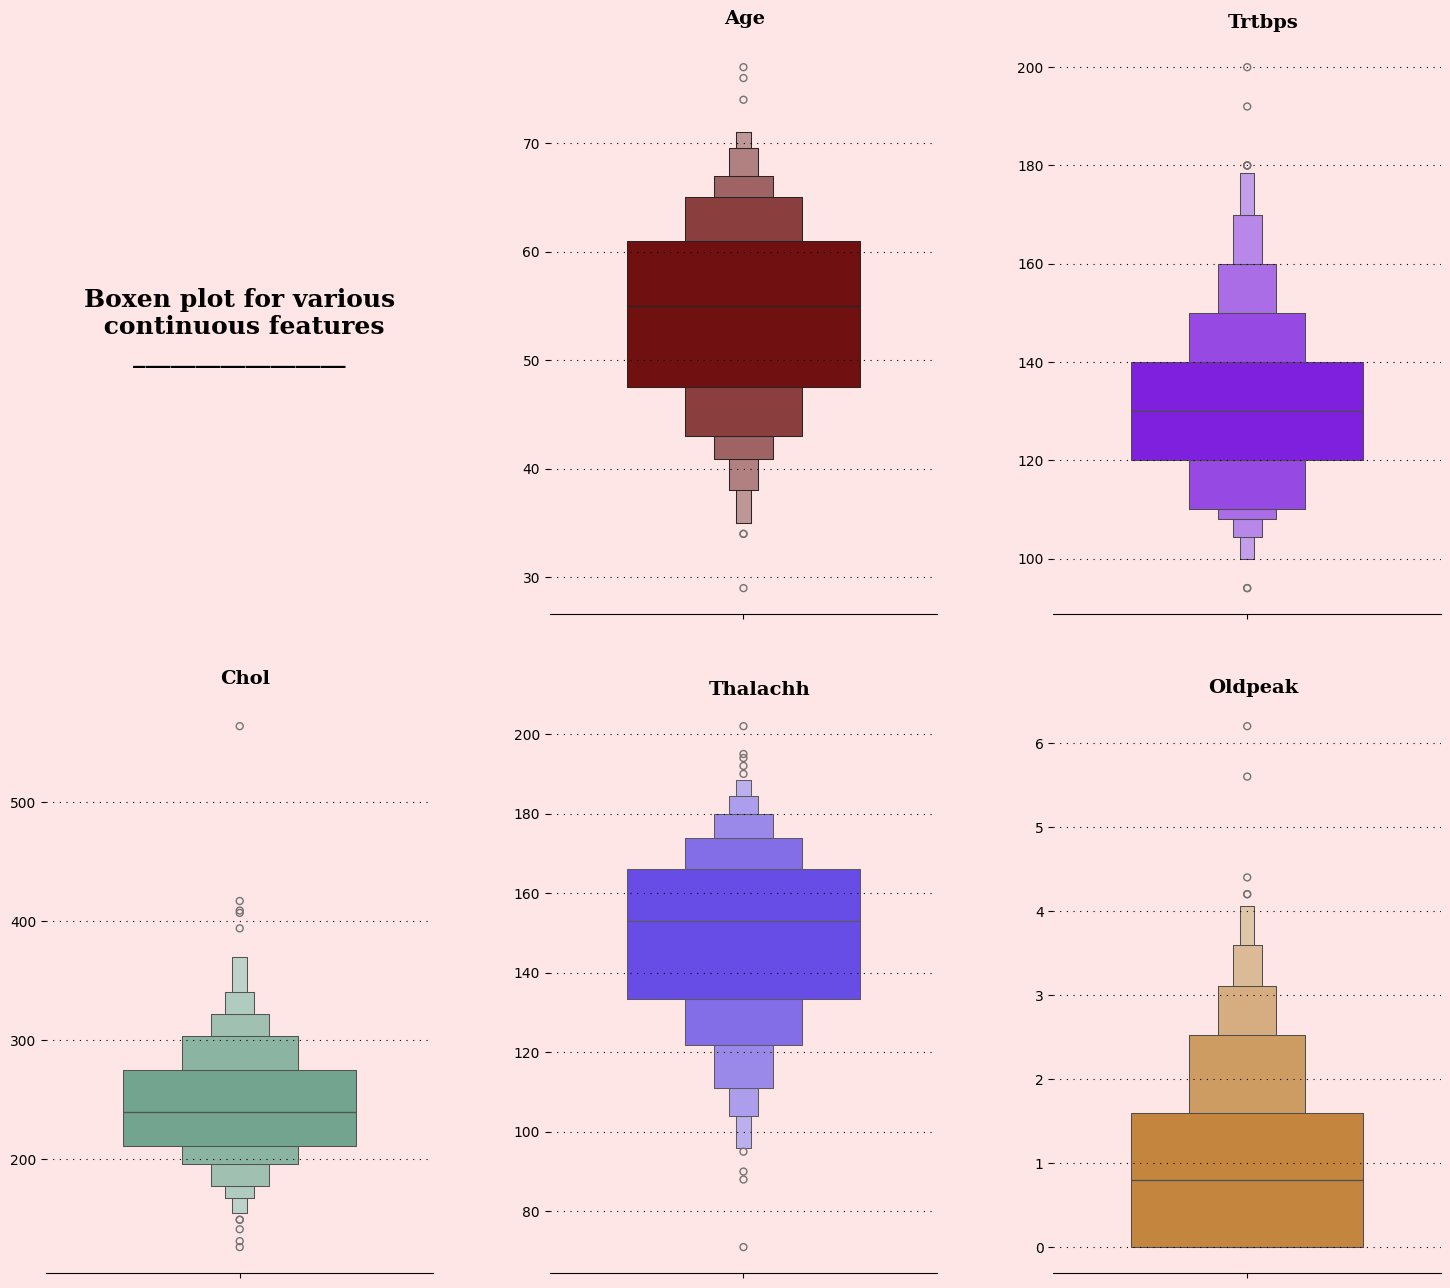

In [11]:
# 가로 18, 세로 16의 크기로 새로운 그래프 figure를 생성합니다.
fig = plt.figure(figsize=(18,16))

# 2x3 크기의 그리드를 생성합니다.
gs = fig.add_gridspec(2,3)

# 그리드 내의 subplot들 사이의 가로 간격을 0.3, 세로 간격을 0.15로 설정합니다.
gs.update(wspace=0.3, hspace=0.15)

# subplot 추가
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# 배경색을 밝은 분홍색으로 설정합니다.
background_color = "#ffe6e6"

# 그래프의 색상 팔레트를 설정합니다.
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# 그래프 스타일 설정
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# 축과 테두리 설정
# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# 첫 번째 subplot에 그래프 제목을 설정합니다.
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# 데이터 그래프 그리기
# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# subplot의 테두리 중에서 상단, 우측, 좌측 테두리를 숨깁니다. (하단 테두리는 보이도록 설정됨)
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

### 3.1.3 타겟 Count plot

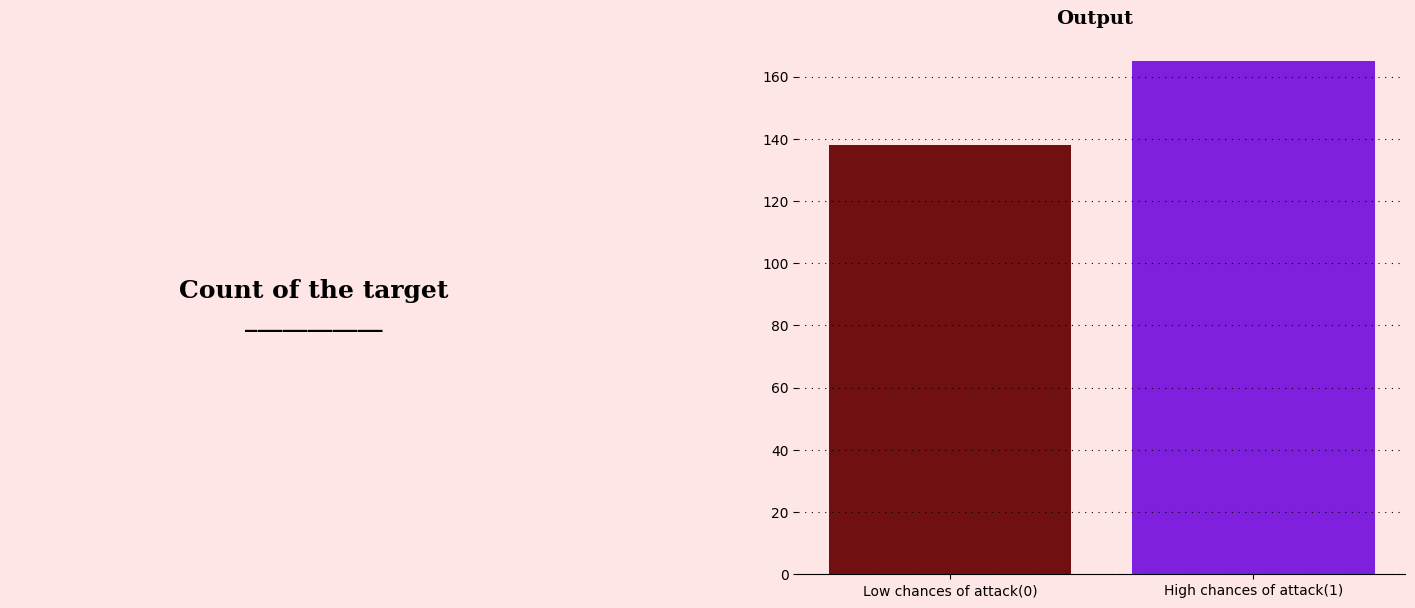

In [12]:
# Figure와 GridSpec 생성
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)

# 서브플롯 생성
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# 배경색 설정
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Title 설정
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

# 첫 번째 서브플롯 설정
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

## 3.2 이변량 분석

### 3.2.1 연속형 특성들의 상관 행렬

In [13]:
# 연속형 변수에 대한 상관관계 계산하고, 행과 열을 전치하여 변수 간의 상관관계 행렬 생성
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


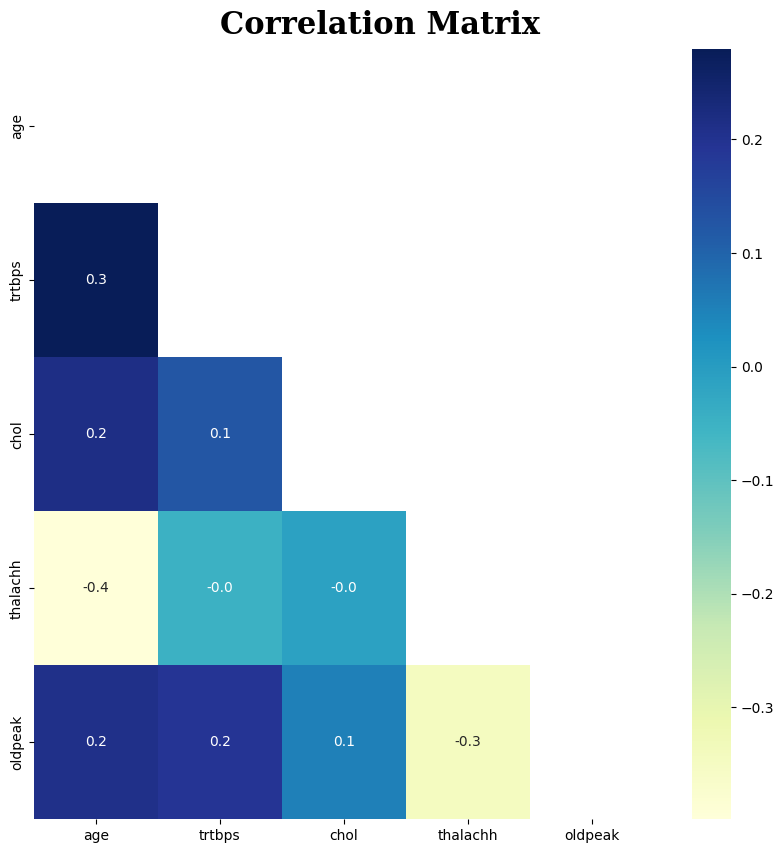

In [14]:
# 그래프 크기 설정
fig = plt.figure(figsize=(10,10))

# 그리드 스펙 설정
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)

# 서브플롯 생성
ax0 = fig.add_subplot(gs[0,0])

# 색상 팔레트 설정
color_palette = ["#5833ff","#da8829"]

# 상관관계 행렬의 삼각 행렬 생성
mask = np.triu(np.ones_like(df_corr))

# 그래프에 제목 추가
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

# 상관관계 행렬 시각화
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')

# 그래프 출력
plt.show()

### 3.2.2 데이터 프레임의 히트맵

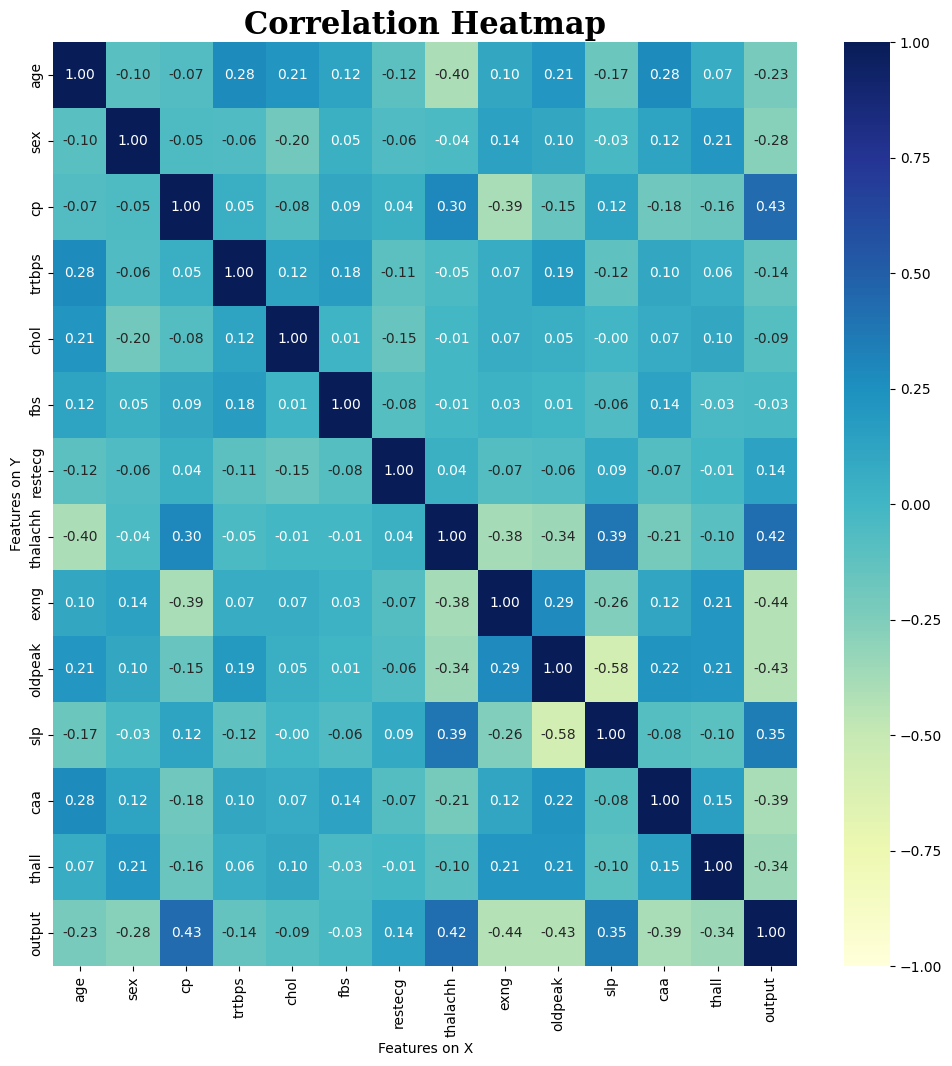

In [15]:
# 히트맵을 그리기 위한 figure 생성
fig = plt.figure(figsize=(12, 12))

# 데이터프레임의 상관관계 계산
corr_mat = df.corr()

# seaborn의 heatmap을 사용하여 히트맵 그리기
sns.heatmap(corr_mat, cmap="YlGnBu", vmin=-1, vmax=1, annot=True, fmt=".2f")

# 그래프 제목 설정
plt.title('Correlation Heatmap', fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

# x축, y축 라벨 설정
plt.xlabel("Features on X")
plt.ylabel("Features on Y")

# 그래프 출력
plt.show()

### 3.2.3 연속형 변수의 타겟 변수에 따른 분포

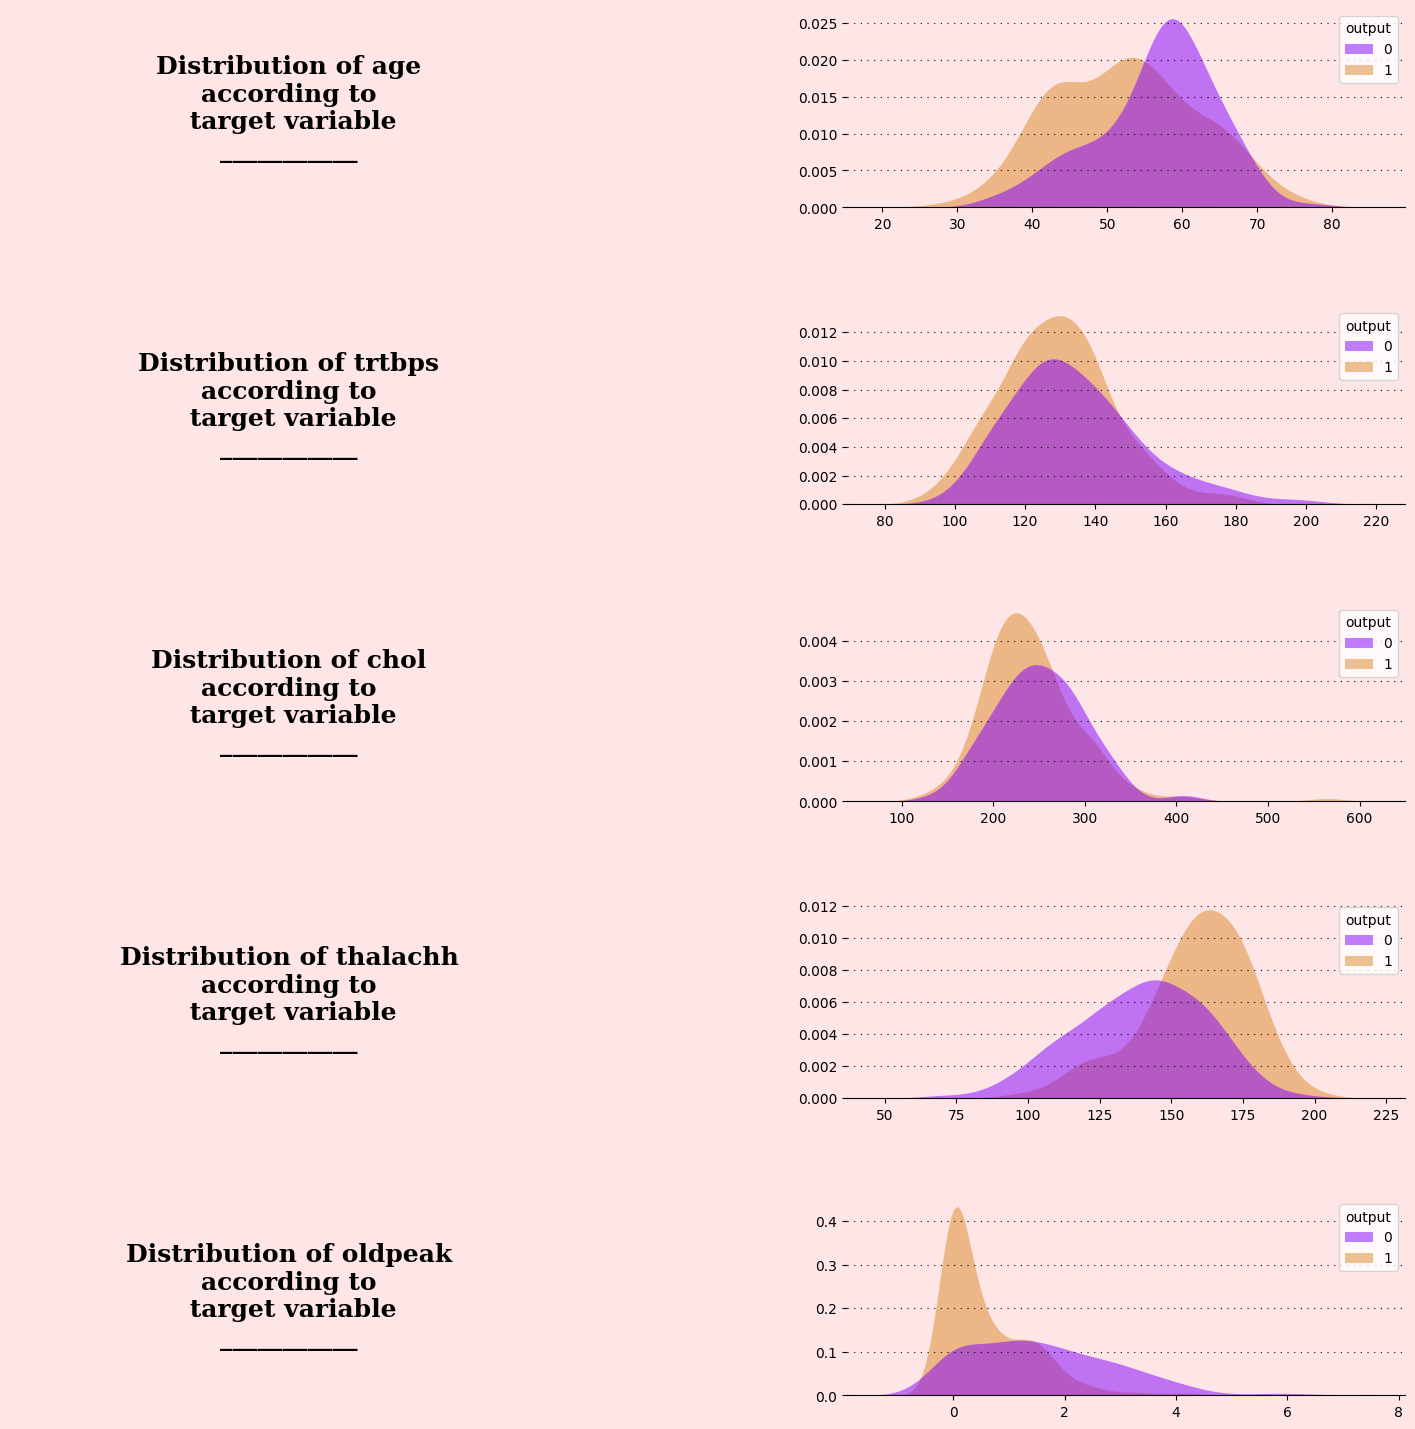

In [16]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### 3.2.4 직관적으로 보이는 몇몇 다른 관계

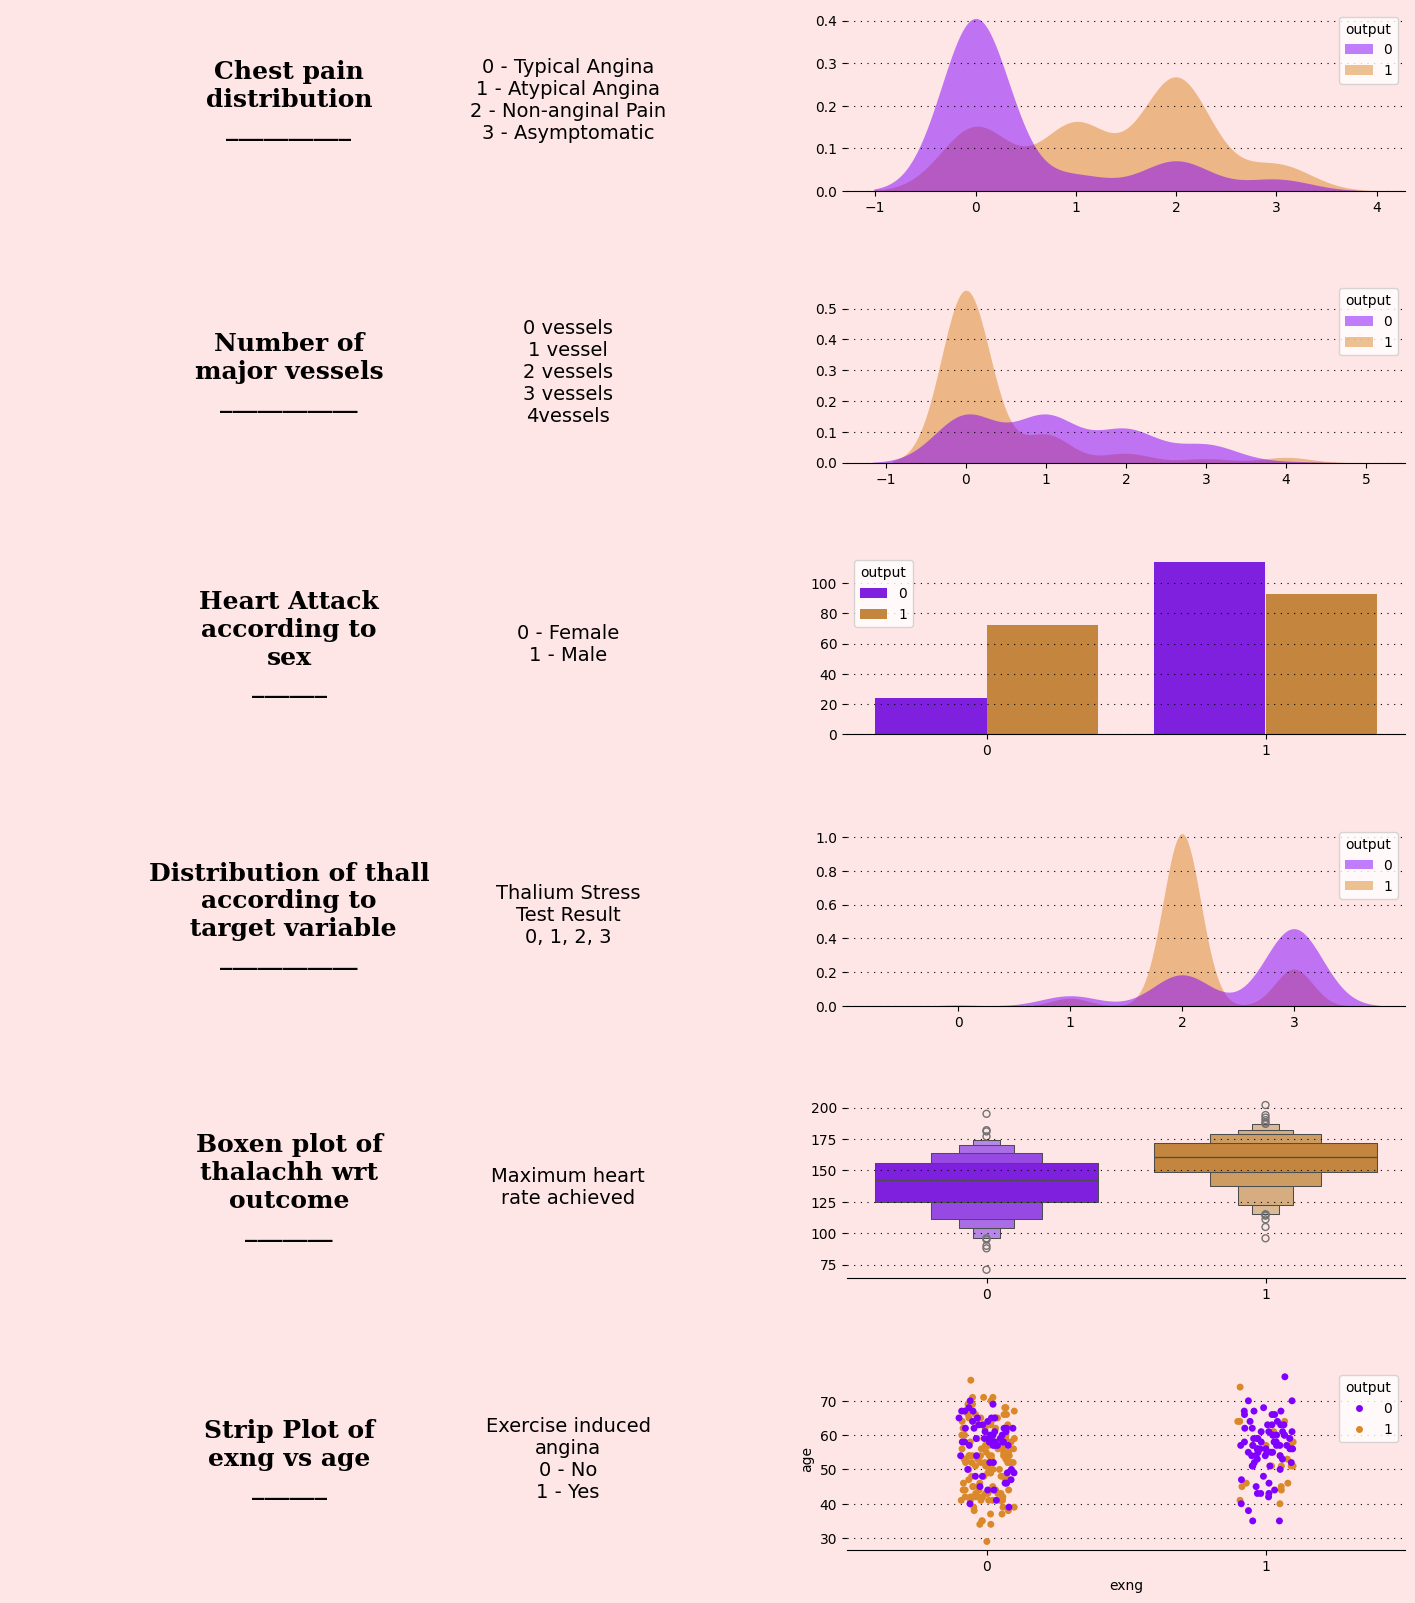

In [17]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

### 3.2.5 한눈에 볼 수 있게 타겟 변수에 따른 페어플롯(pairplot)을 한 그래프에 표현

In [ ]:
# seaborn 라이브러리를 사용하여 데이터프레임(df)의 변수들 간의 관계를 시각화하는 pairplot을 그립니다.
# 'output' 열을 기준으로 데이터 포인트의 색상을 구분하여 시각화하며, 팔레트(palette)를 ["#8000ff", "#da8829"]로 설정하여 색상을 지정합니다.
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])

# 그래프를 출력합니다.
plt.show()

# 4. 데이터 전처리

## 4.1 탐색적 데이터 분석을 통한 결론 도출

1. 데이터에는 결측값(NaN)이 없습니다.
2. 모든 연속 변수에는 특정 이상치(outlier)가 있습니다.
3. 데이터에서 sex = 1인 사람의 수는 sex = 0인 사람의 수보다 두 배 이상 많습니다.
4. 히트맵을 통해 연속 변수 간에는 명확한 선형 상관 관계가 보이지 않습니다.
5. 산점도 히트맵 행렬을 통해 출력과 cp, thalachh, slp 사이에 어느 정도 상관 관계가 있을 수 있다는 것을 시사합니다.
6. 나이가 많을수록 심장 발작 위험이 높을 것으로 직관적으로 생각할 수 있지만, 나이에 따른 출력의 분포 그래프를 보면 그렇지 않다는 것을 알 수 있습니다.
7. 최대 심박수(thalachh)에 따른 출력의 분포 그래프를 보면, 최대 심박수가 높은 사람일수록 심장 발작 위험이 더 높다는 것을 알 수 있습니다.
8. 이전 최저 수치(oldpeak)에 따른 출력의 분포 그래프를 보면, 이전 최저 수치 낮은 사람일수록 심장 발작 위험이 더 높다는 것을 알 수 있습니다.
9. 3.2.4 그래프는 다음과 같은 내용을 보여줍니다.
 - 비협심성 통증(cp = 2)을 가진 사람은 심장 발작 위험이 높습니다.
 - 주요 혈관이 없는 사람(caa = 0)은 심장 발작 위험이 높습니다.
 - 성별이 1인 사람은 심장 발작 위험이 더 높습니다.
 - thall = 2인 사람은 심장 발작 위험이 훨씬 높습니다.
 - 운동 유발 협심증이 없는 사람(exng = 0)은 심장 발작 위험이 더 높습니다.

## 4.2 필요한 패키지

In [ ]:
# Scaling을 위해 RobustScaler를 import합니다.
from sklearn.preprocessing import RobustScaler

# Train Test Split을 위해 train_test_split을 import합니다.
from sklearn.model_selection import train_test_split

# 다양한 머신러닝 모델을 사용하기 위해 필요한 패키지들을 import합니다.
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가를 위해 필요한 패키지들을 import합니다.
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# 교차 검증을 위해 필요한 패키지들을 import합니다.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 패키지들이 모두 import되었음을 확인하는 메시지를 출력합니다.
print('Packages imported...')

## 4.3 모델에 적합한 특성 생성

### 4.3.1 스케일링 및 인코딩

In [ ]:
# df의 복사본을 생성합니다.
df1 = df

# 인코딩과 스케일링을 수행할 열을 정의합니다.
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# 범주형 열을 원핫인코딩합니다.
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

# 특성(feature)과 타겟(target)을 정의합니다.
X = df1.drop(['output'], axis=1)
y = df1[['output']]

# 스케일러를 인스턴스화합니다.
scaler = RobustScaler()

# 연속형 변수를 스케일링합니다.
X[con_cols] = scaler.fit_transform(X[con_cols])

# X의 첫 5개 행을 출력합니다.
print("The first 5 rows of X are")
X.head()

### 4.3.2 train과 test 분할

In [ ]:
# train_test_split 함수를 사용하여 X와 y 데이터를 학습 데이터와 테스트 데이터로 분할
# test_size 매개변수를 0.2로 설정하여 전체 데이터 중 20%를 테스트 데이터로 지정
# random_state를 42로 설정하여 매번 동일한 분할 결과를 얻을 수 있도록 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train 데이터의 크기 출력
print("The shape of X_train is      ", X_train.shape)

# X_test 데이터의 크기 출력
print("The shape of X_test is       ", X_test.shape)

# y_train 데이터의 크기 출력
print("The shape of y_train is      ", y_train.shape)

# y_test 데이터의 크기 출력
print("The shape of y_test is       ", y_test.shape)

# 5. 모델링

## 5.1 선형 분류기

### 5.1.1 Support Vector Machines

In [ ]:
# SVM(Support Vector Machines)의 선형 커널을 사용하는 SVC 객체를 생성하고, 훈련 데이터를 이용하여 모델을 학습시킵니다. kernel='linear'는 선형 커널을 사용하겠다는 의미이며, C=1은 오분류에 대한 페널티를 설정하는 매개변수입니다. random_state=42는 재현 가능한 결과를 얻기 위한 랜덤 시드 값입니다.
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# 테스트 데이터에 대해 예측을 수행하고, 예측 결과를 y_pred에 저장합니다.
y_pred = clf.predict(X_test)

# 테스트 데이터에 대한 예측값과 실제값을 비교하여 정확도를 계산하고 출력합니다.
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

### 5.1.2 SVC 하이퍼파라미터 튜닝

In [ ]:
# 새로운 SVC 객체를 생성합니다.
svm = SVC()

# 하이퍼파라미터 튜닝을 위한 그리드(Grid)를 설정합니다. C와 gamma에 대한 다양한 값을 지정하여 성능을 비교하고 최적의 조합을 찾습니다.
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# GridSearchCV 객체를 생성합니다. 이 객체는 그리드 서치(Grid Search)를 수행하여 최적의 하이퍼파라미터 조합을 찾습니다.
searcher = GridSearchCV(svm, parameters)

# 훈련 데이터를 이용하여 GridSearchCV 객체를 학습시킵니다. 이 과정에서 그리드 서치가 수행됩니다.
searcher.fit(X_train, y_train)

#최적의 하이퍼파라미터 조합과 해당 조합의 최고 점수를 출력합니다.
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# 테스트 데이터에 대해 예측을 수행하고, 예측 결과를 y_pred에 저장합니다.
y_pred = searcher.predict(X_test)

# 하이퍼파라미터 튜닝 후의 테스트 데이터에 대한 예측값과 실제값을 비교하여 정확도를 계산하고 출력합니다.
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

### 5.1.3 로지스틱 회귀 분석

In [ ]:
# 로지스틱 회귀 분석을 위한 LogisticRegression 객체를 생성합니다.
logreg = LogisticRegression()

# 훈련 데이터를 이용하여 로지스틱 회귀 모델을 학습시킵니다.
logreg.fit(X_train, y_train)

# 테스트 데이터에 대한 각 클래스의 예측 확률을 계산합니다.
y_pred_proba = logreg.predict_proba(X_test)

# 예측 확률 중 가장 큰 값을 가지는 클래스를 선택하여 예측값으로 설정합니다.
y_pred = np.argmax(y_pred_proba,axis=1)

# 테스트 데이터에 대한 예측값과 실제값을 비교하여 정확도를 계산하고 출력합니다.
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

### 5.1.4 ROC 곡선

In [ ]:
# 로지스틱 회귀 모델에서 클래스 1에 대한 예측 확률을 계산합니다.
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# ROC 곡선을 그리기 위해 FPR(False Positive Rate), TPR(True Positive Rate), 임계값(thresholds)을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# ROC 곡선을 그래프로 출력합니다. x축은 FPR, y축은 TPR입니다. ROC 곡선은 분류 모델의 성능을 평가하는 데 사용됩니다.
plt.plot([0, 1], [0, 1], "k--", color='red', label='Random')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")

# 범례
plt.legend()

plt.show()

## 5.2 트리 모델

### 5.2.1 의사결정 트리

In [ ]:
# 의사결정 트리 모델 객체 생성
dt = DecisionTreeClassifier(random_state = 42)

# 모델 학습
dt.fit(X_train, y_train)

# 예측값 계산
y_pred = dt.predict(X_test)

# 테스트 정확도 출력
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

### 5.2.2 랜덤 포레스트

In [ ]:
# 랜덤 포레스트 모델 객체 생성
rf = RandomForestClassifier()

# 모델 학습
rf.fit(X_train, y_train)

# 예측값 계산
y_pred = dt.predict(X_test)

# 테스트 정확도 출력
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

### 5.2.3 그래디언트 부스팅 분류기 - 튜닝하지 않음

In [ ]:
# 그래디언트 부스팅 분류기 모델 객체 생성. 앙상블 학습 기법 중 하나로, 여러 개의 결정 트리를 조합하여 예측 모델을 구성하는 방법입니다.
# GradientBoostingClassifier: Gradient Boosting Classifier를 생성하는 클래스입니다.
# n_estimators: 생성할 결정 트리의 개수를 지정합니다.
# max_depth: 각 결정 트리의 최대 깊이를 제한하는 파라미터입니다.
# subsample: 각 결정 트리를 학습할 때 사용할 훈련 데이터의 비율을 설정합니다.
# max_features: 각 결정 트리에서 사용할 특성의 최대 비율을 설정합니다. 이 예시에서는 0.2로 설정하여 전체 특성 중 20%의 특성만 사용합니다.
# random_state: 결과를 재현하기 위해 난수 시드를 설정합니다.
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# 모델 학습
gbt.fit(X_train,y_train)

# 예측값 계산
y_pred = gbt.predict(X_test)

# 테스트 정확도 출력
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))